Попробуйте обучить нейронную сеть на Keras на Fashion-MNIST датасете.
Опишите в комментарии к уроку - какой результата вы добились от нейросети? Что помогло вам улучшить ее точность?

In [1]:
import numpy as np
import keras
from keras.layers import Input, Dense, Flatten, Convolution2D, MaxPooling2D, Dropout
 
# The first time you run this might be a bit slow, since the
# mnist package has to download and cache the data.
fashion_mnist = keras.datasets.fashion_mnist
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

 
print(train_images.shape) # (60000, 784)
print(test_images.shape)  # (10000, 784)

(60000, 28, 28)
(10000, 28, 28)


In [2]:
# define the keras model
from keras.models import Sequential
from keras.utils import to_categorical
import matplotlib.pyplot as plt

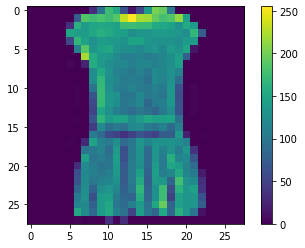

In [3]:
plt.figure()
plt.imshow(train_images[3])
plt.colorbar()
plt.grid(False)
plt.show()

In [4]:
# Normalize the images.
train_images = (train_images / 255) 
test_images = (test_images / 255) 




# Flatten the images.
train_images = train_images.reshape((-1, 784))
test_images = test_images.reshape((-1, 784))

In [5]:

# Build the model.
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    Dense(128, activation='relu'),
    Dense(64, activation='relu'),
    Dense(10, activation='softmax')
])

# Compile the model.
model.compile(
  optimizer='adam',
  loss='sparse_categorical_crossentropy',
  metrics=['accuracy'],
)

In [6]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 128)               100480    
_________________________________________________________________
dense_1 (Dense)              (None, 64)                8256      
_________________________________________________________________
dense_2 (Dense)              (None, 10)                650       
Total params: 109,386
Trainable params: 109,386
Non-trainable params: 0
_________________________________________________________________


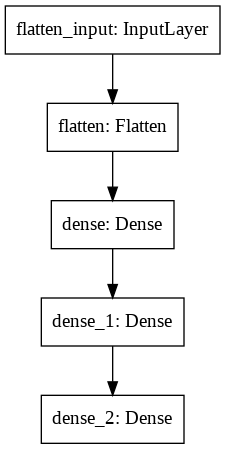

In [7]:
from keras.utils import plot_model
plot_model(model, to_file='model.png')

In [8]:


# Train the model.
model.fit(train_images, train_labels, epochs=20,batch_size=32,validation_split=0.2,
        verbose=0)

In [9]:

# Evaluate the model.
model.evaluate(
  test_images, 
  test_labels,
   verbose=2
)

# Predict on the first 5 test images.
predictions = model.predict(test_images[:10])

# Print our model's predictions.
print(np.argmax(predictions, axis=1)) # 

# Check our predictions against the ground truths.
print(test_labels[:10]) # 

313/313 - 1s - loss: 0.3972 - accuracy: 0.8847
[9 2 1 1 6 1 4 6 5 7]
[9 2 1 1 6 1 4 6 5 7]


In [10]:
def plot_image(i, predictions_array, true_label, img):
  predictions_array, true_label, img = predictions_array[i], true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])

  plt.imshow(img, cmap=plt.cm.binary)

  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'

  plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)

def plot_value_array(i, predictions_array, true_label):
  predictions_array, true_label = predictions_array[i], true_label[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color="#777777")
  plt.ylim([0, 1])
  predicted_label = np.argmax(predictions_array)

  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')

In [11]:
# Save the model to disk.
model.save_weights('model.lesson2')

# Load the model from disk later using:

In [12]:
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

In [13]:
# Normalize the images.
train_images = (train_images / 255) - 0.5
test_images = (test_images / 255) - 0.5


# Flatten the images.
train_images = train_images.reshape((-1, 784))
test_images = test_images.reshape((-1, 784))

In [14]:
result = {}


In [15]:
def model1(X_train, y_train):
    
    model = Sequential([
  Dense(64, activation='relu', input_shape=(784,)),
  Dense(128, activation='relu'),
    Dense(64, activation='relu'),
  Dense(10, activation='softmax'),
])
    
    model.compile(
  optimizer='Adadelta',
  loss='cosine_similarity',
  metrics=['top_k_categorical_accuracy'],
)
    
    history = model.fit(
        X_train,
        to_categorical(y_train),
        epochs=30,
        batch_size=32,
        validation_split=0.25,
        verbose=0
    )
  
    
    return (model, history.history)

In [16]:
model1, result[model1] = model1(train_images, train_labels)

In [17]:
model1.evaluate(
  test_images,
  to_categorical(test_labels)
)

313/313 [==============================] - 1s 2ms/step - loss: -0.7716 - top_k_categorical_accuracy: 0.9868


[-0.771645188331604, 0.9868000149726868]

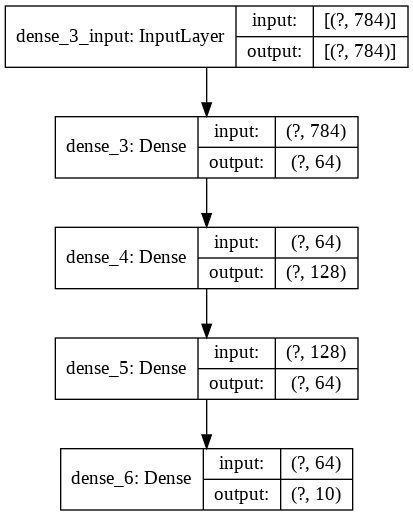

In [18]:
plot_model(model1, show_shapes=True)

In [19]:
from keras.layers.normalization import BatchNormalization
def model2(X_train, y_train):
        
    
    model = Sequential([
  Dense(64, activation='relu', input_shape=(784,)),
  Dense(128, activation='relu'),
    Dense(64, activation='relu'),
  Dense(10, activation='softmax'),
])
    
    model.compile(
  optimizer='Adam',
  loss='cosine_similarity',
  metrics=['top_k_categorical_accuracy'],
)
    
    history = model.fit(
        X_train,
        to_categorical(y_train),
        epochs=30,
        batch_size=32,
        validation_split=0.2,
        verbose=0
    )
  
    
    return (model, history.history)

In [20]:
model2, result[model2] = model2(train_images, train_labels)

In [23]:
model2.evaluate(
  test_images,
  to_categorical(test_labels)
)

313/313 [==============================] - 1s 2ms/step - loss: -0.8942 - top_k_categorical_accuracy: 0.9958


[-0.894243061542511, 0.9958000183105469]

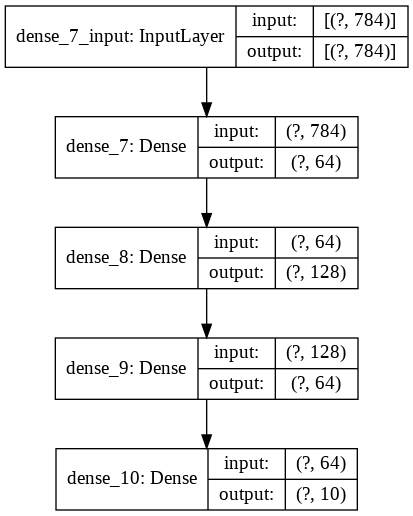

In [21]:

plot_model(model2, show_shapes=True)

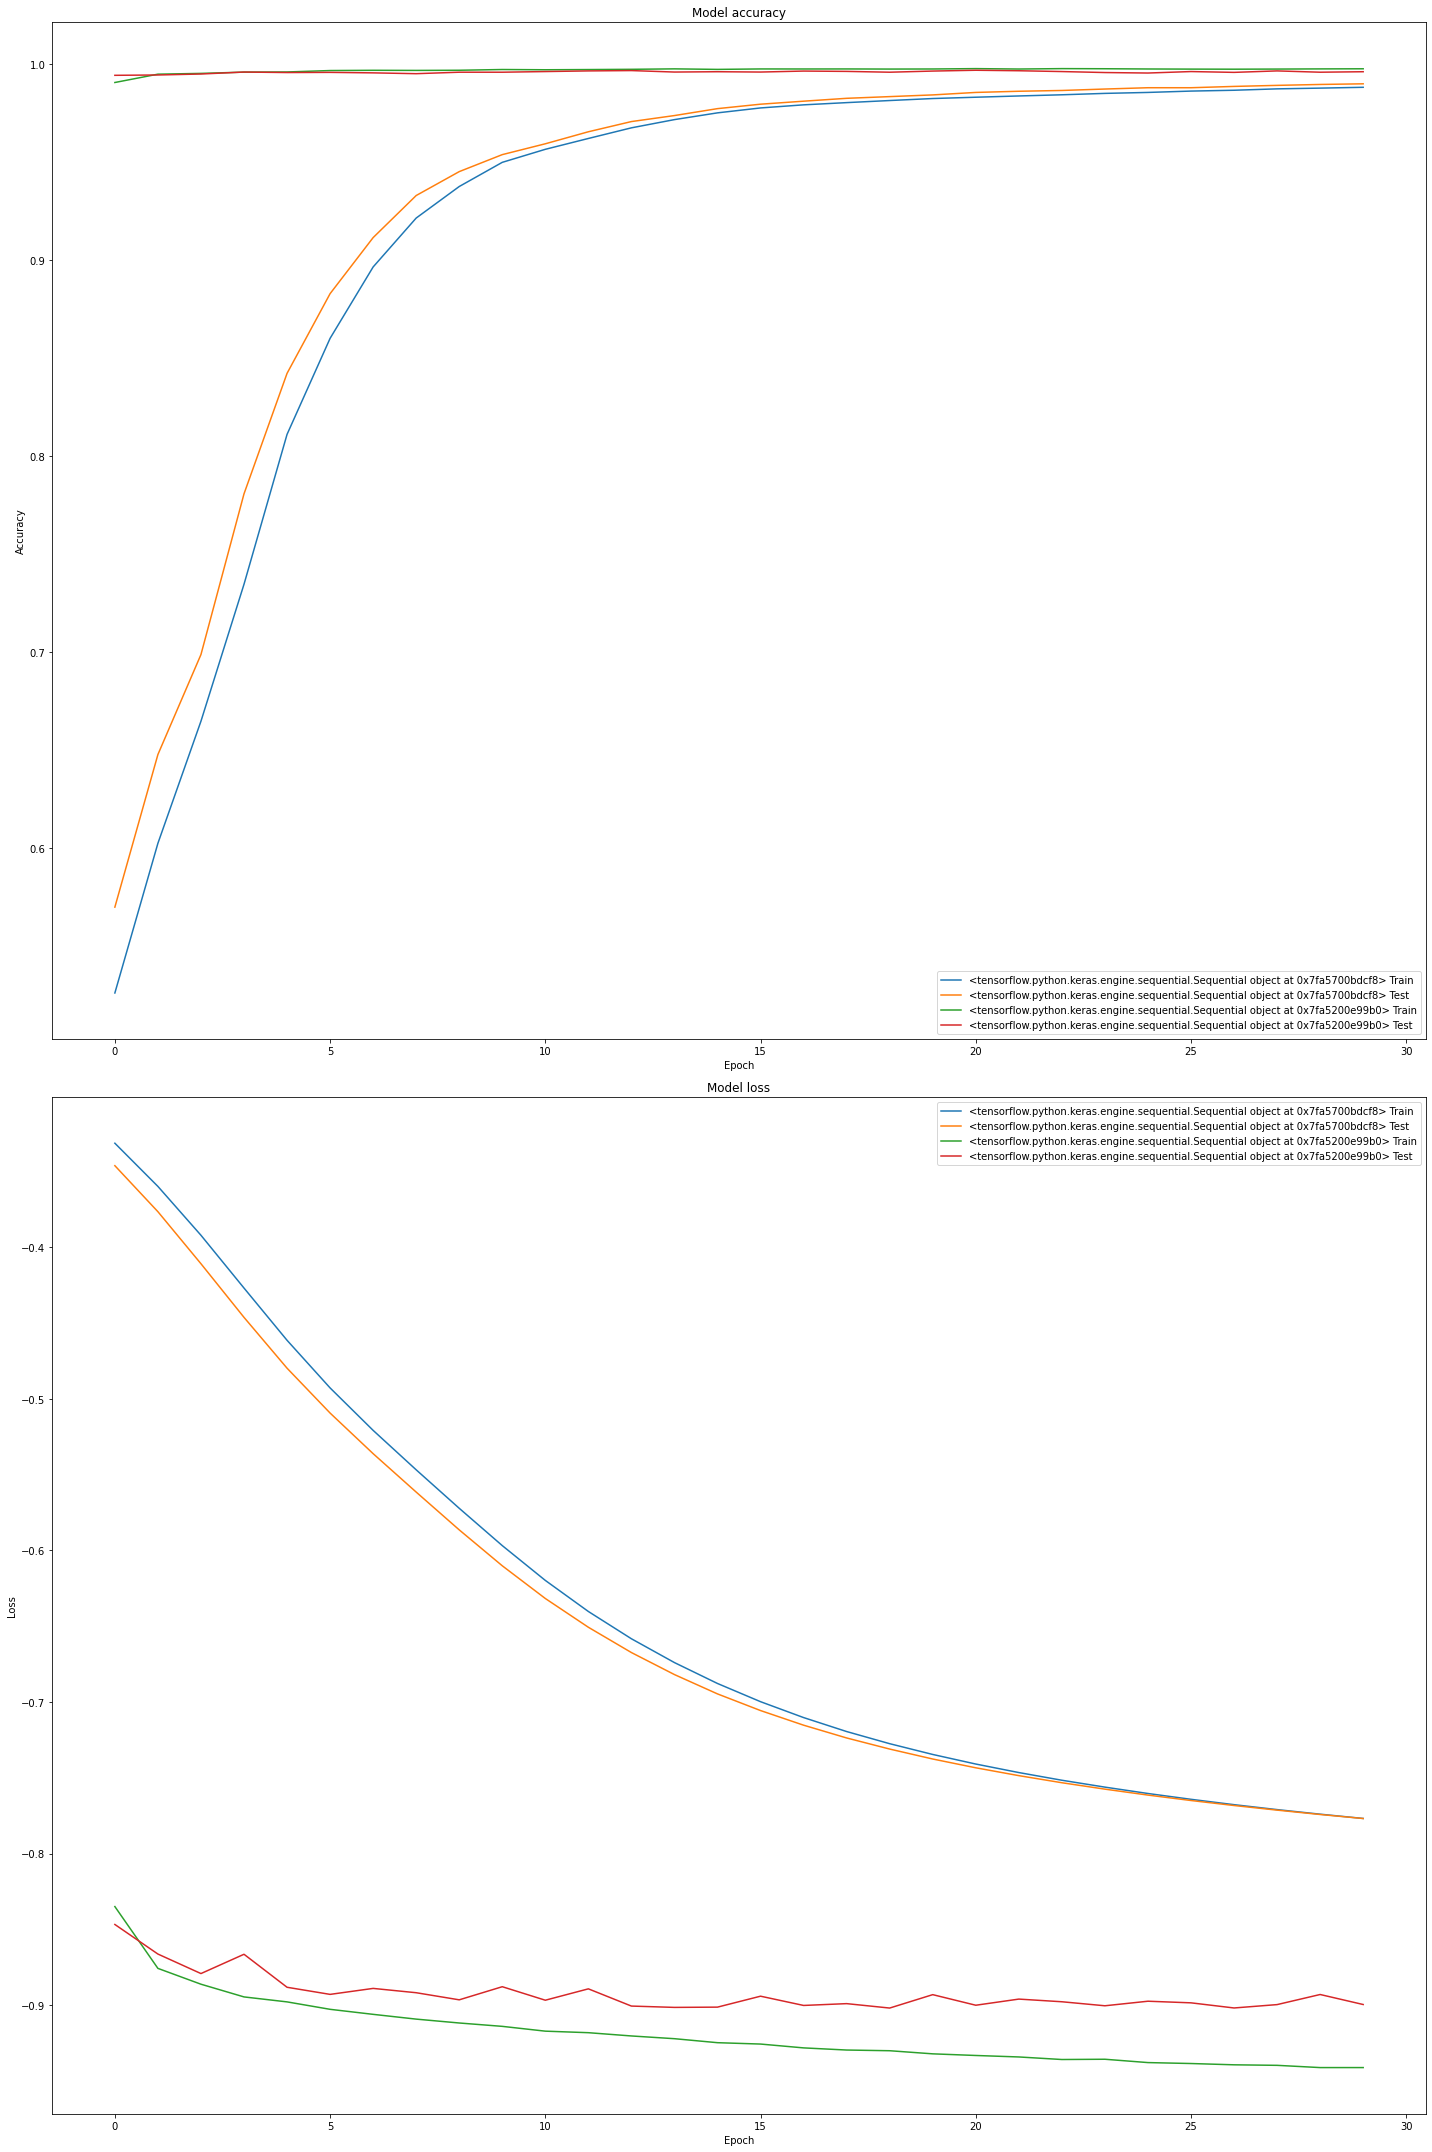

In [22]:
fig, (ax1, ax2) = plt.subplots(2, 1)
fig.set_figheight(30)
fig.set_figwidth(20)

ax1.set_title('Model accuracy')
ax1.set_xlabel('Epoch')
ax1.set_ylabel('Accuracy')

ax2.set_title('Model loss')
ax2.set_xlabel('Epoch')
ax2.set_ylabel('Loss')


for name, history in result.items():
    ax1.plot(history['top_k_categorical_accuracy'], label=f'{name} Train')
    ax1.plot(history['val_top_k_categorical_accuracy'], label=f'{name} Test')
    ax2.plot(history['loss'], label=f'{name} Train')
    ax2.plot(history['val_loss'], label=f'{name} Test')

ax1.legend(loc='lower right')
ax2.legend(loc='upper right')
fig.tight_layout()

Увеличение эпох приводило в основном к переобучению, куда большую пользу принесли экспиременты с метрикой и оптимизатором